d:\Users\lreis\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\Users\lreis\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


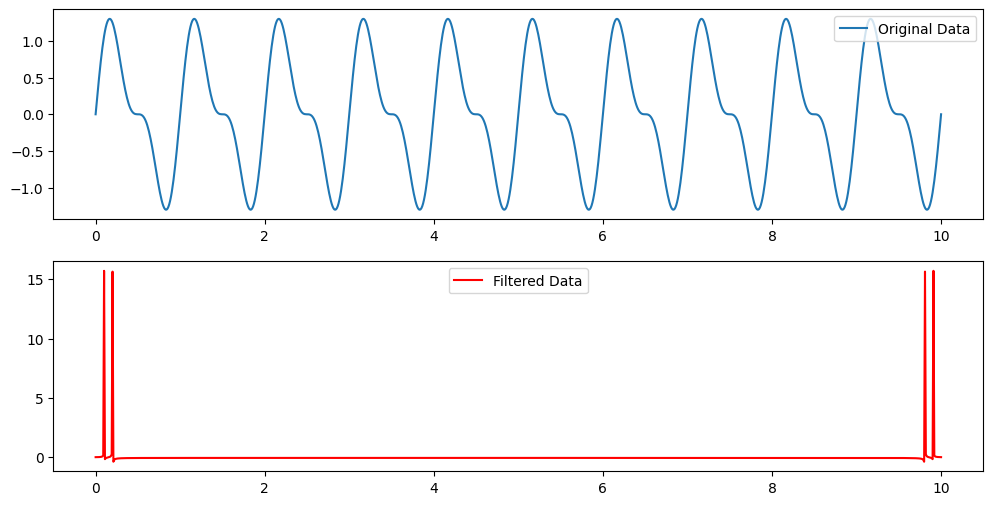

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Example data: y = periodic_function(x)
x = np.linspace(0, 10, 1000)
y = np.sin(2 * np.pi * x) + 0.5 * np.sin(4 * np.pi * x)

# Apply Fourier Transform
Y = fft(y)

# Zero out the dominant frequencies
# threshold = 10
# Y[threshold:-threshold] = 0

# # Apply Inverse Fourier Transform
# y_filtered = ifft(Y)

# Plot the original and filtered data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y, label='Original Data')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(x, Y, label='Filtered Data', color='red')
plt.legend()
plt.show()


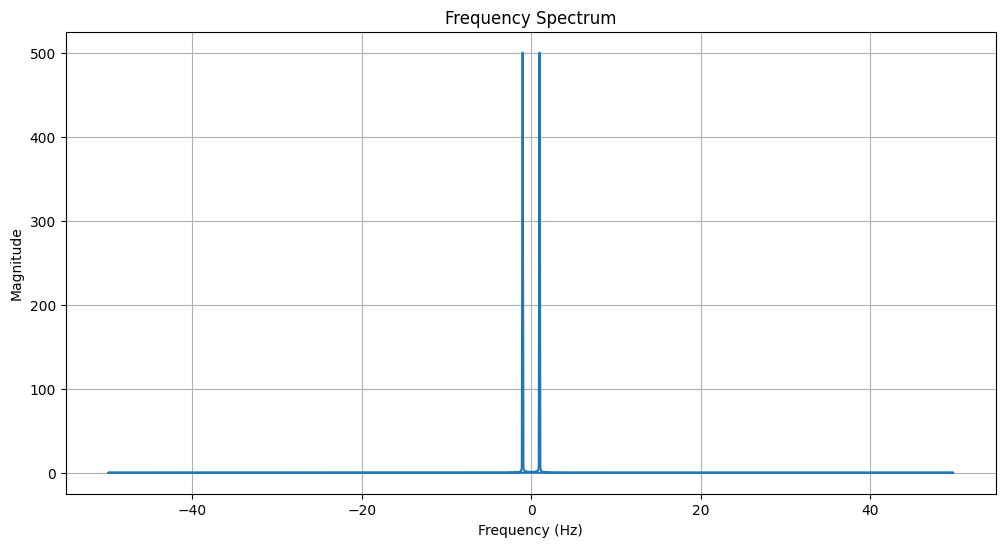

Significant frequencies observed in the function:
[ 0.999 -0.999]


C:\Users\lreis\AppData\Local\Temp\ipykernel_41680\1760671603.py:33: RuntimeWarning: divide by zero encountered in true_divide
  y_norm = y/np.sin(2*np.pi*x)


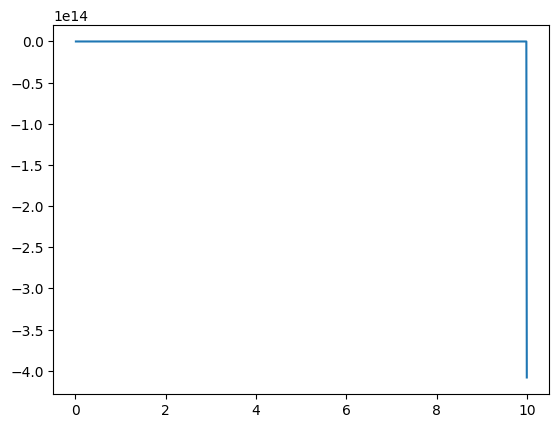

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Sample data
x = np.linspace(0, 10, 1000)
y = np.cos(2 * np.pi * x)

# Perform Fourier Transform
Y = fft(y)
# Get the frequencies corresponding to the FFT result
frequencies = fftfreq(len(x), d=(x[1] - x[0]))

# Compute the magnitude of the FFT result
magnitude = np.abs(Y)

# Plot the magnitude of the Fourier Transform
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Find the significant frequencies (peaks in the magnitude)
significant_indices = np.where(magnitude > np.max(magnitude) * 0.1)[0]
significant_frequencies = frequencies[significant_indices]

print("Significant frequencies observed in the function:")
print(significant_frequencies)

y_norm = y/np.sin(2*np.pi*x)
plt.plot(x, y_norm)

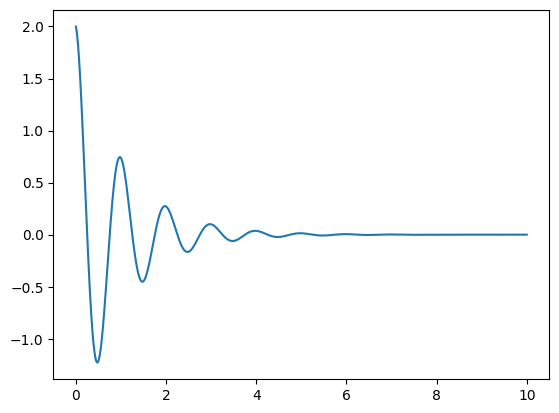

In [52]:
def func(t):
    return np.exp(-t)*(2*np.cos(2*np.pi*t))

x = np.linspace(0, 10, 1000)
y = func(x)

plt.plot(x, y)

[ 0.999 -0.999]


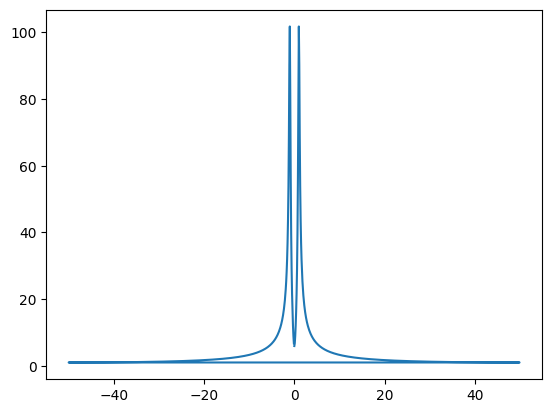

In [58]:
Y = fft(y)
# Get the frequencies corresponding to the FFT result
frequencies = fftfreq(len(x), d=(x[1] - x[0]))

# Compute the magnitude of the FFT result
magnitude = np.abs(Y)

plt.plot(frequencies, magnitude)
# plt.plot(frequencies, (lambda x : np.exp(-x))(magnitude) )

significant_indices = np.where(magnitude > np.max(magnitude) * 0.9)[0]
significant_frequencies = frequencies[significant_indices]

print(significant_frequencies)

# plt.bar([i for i in range(0, len(significant_frequencies))], significant_frequencies)

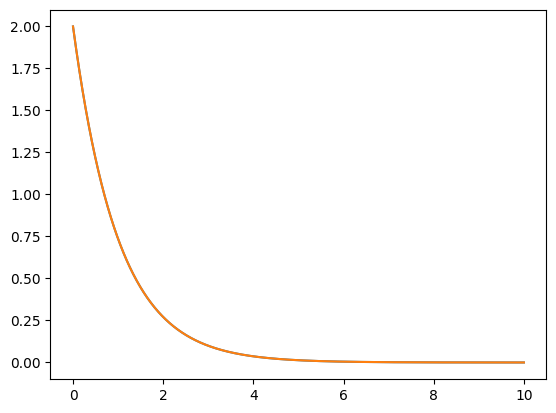

In [63]:
y_pred = y/np.cos(2*np.pi*x)
plt.plot(x,y_pred)
plt.plot(x, (lambda x: 2*np.exp(-x))(x))

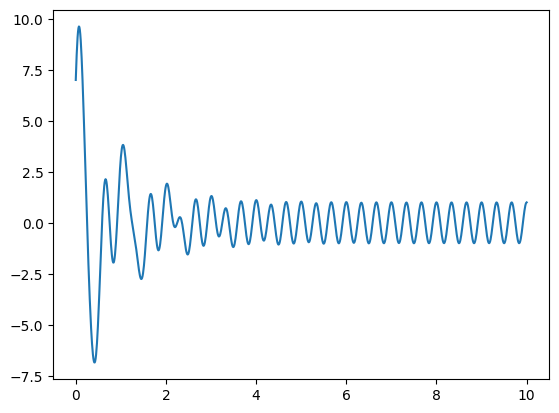

In [90]:
def func(t):
    return 3*np.exp(-t)*(2*np.cos(2*np.pi*t) + 2*np.sin(4*np.pi*t)) + np.cos(6*np.pi*t)

x = np.linspace(0, 10, 1000)
y = func(x)

plt.plot(x, y)

[ 0.      0.0999  0.1998  0.2997  0.3996  0.4995  0.5994  0.6993  0.7992
  0.8991  0.999   1.0989  1.1988  1.2987  1.3986  1.4985  1.5984  1.6983
  1.7982  1.8981  1.998   2.0979  2.1978  2.2977  2.3976  2.4975  2.5974
  2.6973  2.7972  2.8971  2.997   3.0969  3.1968  3.2967  3.3966  3.4965
 -3.4965 -3.3966 -3.2967 -3.1968 -3.0969 -2.997  -2.8971 -2.7972 -2.6973
 -2.5974 -2.4975 -2.3976 -2.2977 -2.1978 -2.0979 -1.998  -1.8981 -1.7982
 -1.6983 -1.5984 -1.4985 -1.3986 -1.2987 -1.1988 -1.0989 -0.999  -0.8991
 -0.7992 -0.6993 -0.5994 -0.4995 -0.3996 -0.2997 -0.1998 -0.0999]


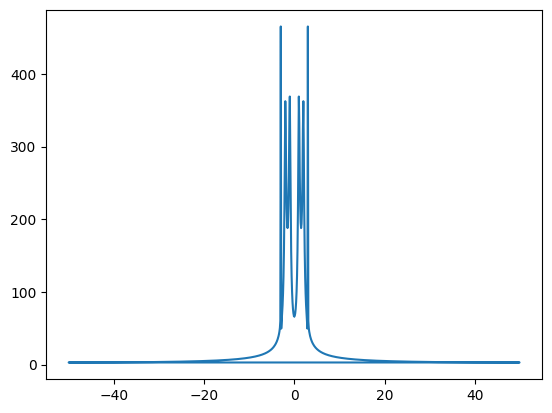

In [91]:
Y = fft(y)
# Get the frequencies corresponding to the FFT result
frequencies = fftfreq(len(x), d=(x[1] - x[0]))

# Compute the magnitude of the FFT result
magnitude = np.abs(Y)

plt.plot(frequencies, magnitude)
# plt.plot(frequencies, (lambda x : np.exp(-x))(magnitude) )

significant_indices = np.where(magnitude > np.max(magnitude) * 0.08)[0]
significant_frequencies = frequencies[significant_indices]

print(significant_frequencies)

# plt.bar([i for i in range(0, len(significant_frequencies))], significant_frequencies)

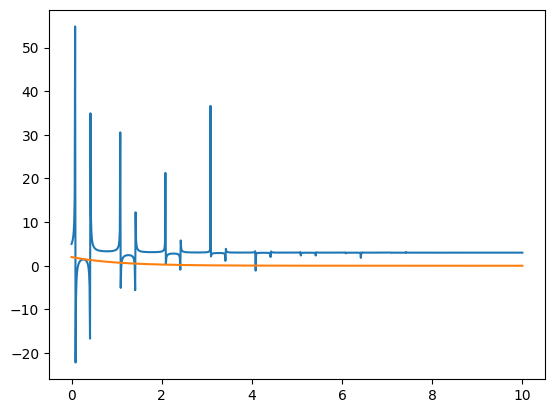

In [80]:
y_pred = y/(np.cos(6*np.pi*x))
plt.plot(x,y_pred)
plt.plot(x, (lambda x: 2*np.exp(-x))(x))

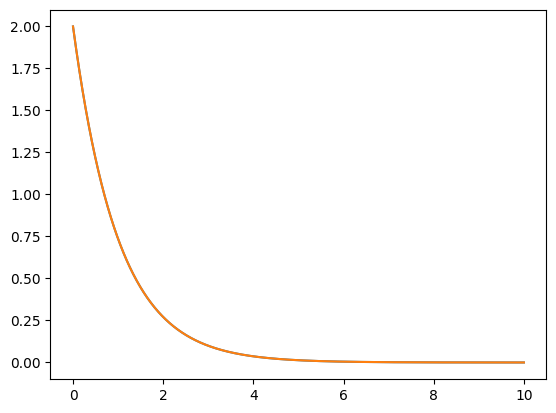

In [77]:
y_pred = y/(np.cos(2*np.pi*x) + np.sin(4*np.pi*x))
plt.plot(x,y_pred)
plt.plot(x, (lambda x: 2*np.exp(-x))(x))

In [102]:
2*np.pi*1.1988

7.532282546246888

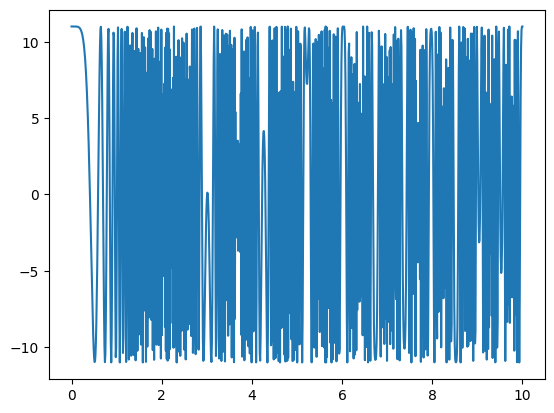

In [136]:
def func(t):
    return 11*np.cos(7.33*np.pi*x**3)

x = np.linspace(0, 10, 1000)
y = func(x)

plt.plot(x, y)

[ 0.1998  6.2937 -6.2937 -0.1998]


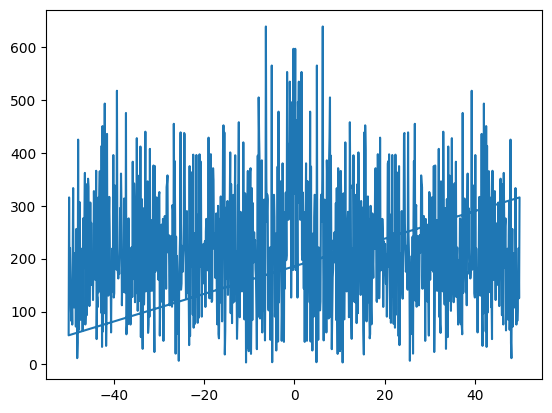

In [138]:
Y = fft(y)
# Get the frequencies corresponding to the FFT result
frequencies = fftfreq(len(x), d=(x[1] - x[0]))

# Compute the magnitude of the FFT result
magnitude = np.abs(Y)

plt.plot(frequencies, magnitude)
# plt.plot(frequencies, (lambda x : np.exp(-x))(magnitude) )

significant_indices = np.where(magnitude > np.max(magnitude) * 0.9)[0]
significant_frequencies = frequencies[significant_indices]

print(significant_frequencies)

# plt.bar([i for i in range(0, len(significant_frequencies))], significant_frequencies)

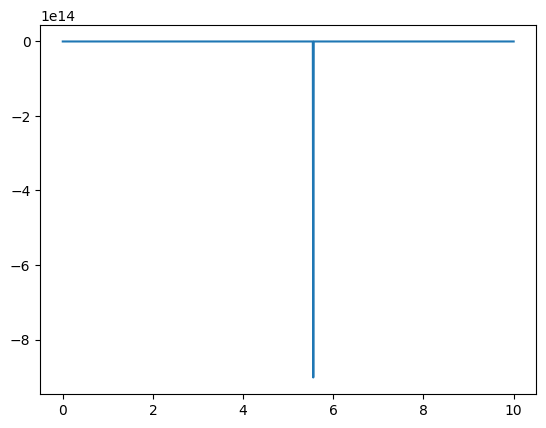

In [135]:
y_pred = y/(np.cos(np.pi*3.69*x))
plt.plot(x,y_pred)
# plt.plot(x, (lambda x: 2*np.exp(-x))(x))

In [1]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
x = smp.symbols("x")
expr = 10*smp.exp(-0.5*smp.exp(-0.5*x+2))
smp_expr = expr
smp_expr

10*exp(-0.5*exp(2 - 0.5*x))

In [3]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "exp-": lambda a: np.exp(-a)}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"],
                         "exp-": ["np.exp(-", ")"]}
weigths_op = {"exp-": 4}

def funcaasa(x):
    return 10*np.exp(-0.5*np.exp(-0.5*x + 2))

X7 = np.linspace(-5, 15, 1000)
y7 = funcaasa(X7)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = smp.symbols("x")
SR = SymbolicRegression(10, functions=functions_op, operators=operators_op, custom_functions_dict=custom_functions_dict)
SR.fit(np.c_[X7],y7, feature_names=["x"])

In [5]:
SR._functions

['sin', 'cos', 'square', 'exp-']

5.389560296353389*exp(0.1028325945325115/(0.9195285840503705 - sin(cos(x))))

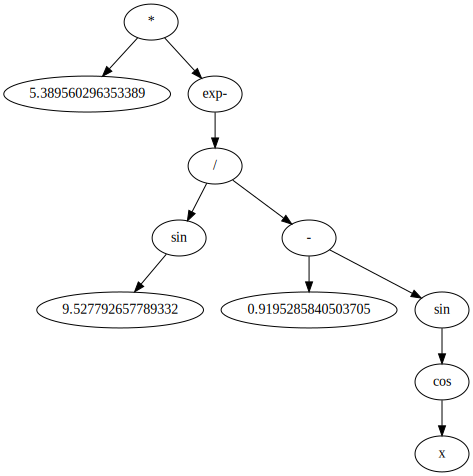

In [49]:
with open("Outputs/article_tests_new/F11_new/random_LS/trees/tree-2000-8-2", "rb") as file:
    tree = pickle.load(file)
    # display(tree.toString_smp(SR._operators, SR._functions, SR.custom_functions_dict))
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
    display(tree.visualize_tree())


3.12210072691959e-14 + 987814.537125153*exp(-1070.70195290722*exp(-6.2384175e-7*x))

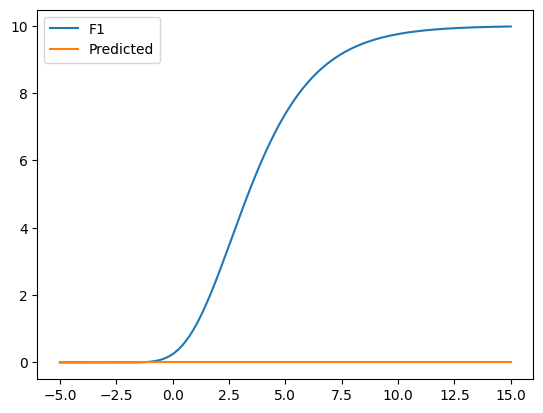

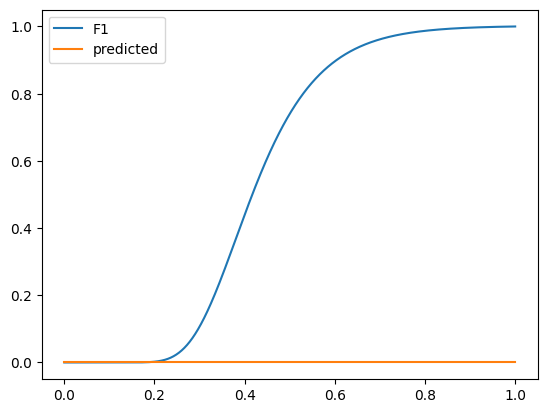

In [128]:
# ======================
smp_func, _ = tree.toFunc(SR._operators, SR._functions, SR.custom_functions_dict)


smp_expr = smp_expr.subs(x, (x - X7.min())/(X7.max() - X7.min()))
# smp_expr = smp_expr.subs(x, (X1.max() - X1.min())*x + X1.min() )
smp_expr = (y7.max() - y7.min())*smp_expr + y7.min()
# smp_expr = (y1_max - y1_min)*smp_expr + y1_min
# smp_expr = (smp_expr - y1.min())/(y1.max() - y1.min())
display(smp_expr)

# smp_func = SR.toFunc(tree)
smp_func = smp.lambdify([x], smp_expr)

X = np.linspace(-5, 15, 1000)
y = smp_func(X)


plt.plot(X7, y7, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()
plt.plot(scaler.fit_transform(np.c_[X7]), scaler.fit_transform(np.c_[y7]), label="F1")
plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="predicted")
plt.legend()

In [88]:
with open("Outputs/fundamental/base_specific/trees/tree-1000-3-0", "rb") as file:
    tree = pickle.load(file)
    tree.toSmpExpr()
    
display(tree.visualize_tree())


TypeError: toSmpExpr() missing 3 required positional arguments: 'operators', 'functions', and 'custom_functions_dict'

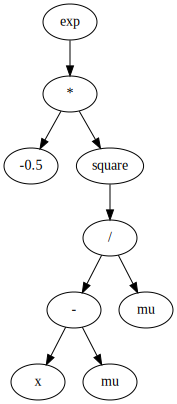

In [7]:
tree = ExpressionTree()
root = tree.add_root("exp")
p1 = tree.add_left(root, "*")
tree.add_left(p1, "-0.5")
p2 = tree.add_right(p1, "square")
p3 = tree.add_left(p2, "/")
p31 = tree.add_left(p3, "-")
tree.add_left(p31, "x")
tree.add_right(p31, r"\mu")
tree.add_right(p3, "mu")
tree.visualize_tree()



In [2]:
def f1(v):
    return 1.57 + 24.3*v

X1 = np.linspace(-2, 2, 1000)
y1 = f1(X1)

def f2(v, y, w):
    return 0.23 + 14.2*(v+y)/(3*w)

v2 = np.linspace(-2, 2, 1000)
y2 = np.linspace(-2, 2, 1000)
w2 = np.linspace(-2, 2, 1000)
y2 = f2(v2, y2, w2)

def f11(x):
    return 6.87 + 11*np.cos(7.23*x**3)

X11 = np.linspace(-2, 2, 1000)
y11 = f11(X11)

def f7(x):
    return 213.809408*(1 - np.exp(-0.547237*x))

X7 = np.linspace(-2, 2, 1000)
y7 = f7(X7)

In [3]:
n_runs = 3
n_generations = 10
pop_size = 40
random_const_range = (0, 15)

In [4]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "cube": lambda a: a**3}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"]}

# F1

In [5]:
optimization_kind = "LS"
func = f1
x_range = [-2,2]
n_points = 1000
population = 40
generations = 10
const_range = (0,15)
dir_path = "Outputs/article_tests_new/LS"

In [6]:
optimization_opts = ["PSO", "LS", "random_LS", "differential_evolution", "dual_annealing"]
main_path = "Outputs/article_tests_new/"
paths = [main_path + i for i in optimization_opts]
paths

['Outputs/article_tests_new/PSO',
 'Outputs/article_tests_new/LS',
 'Outputs/article_tests_new/random_LS',
 'Outputs/article_tests_new/differential_evolution',
 'Outputs/article_tests_new/dual_annealing']

In [7]:
def create_dirs(path):
    if not os.path.exists(path+"/data"):
        os.makedirs(path+"/data")
    if not os.path.exists(path+"/trees"):
        os.makedirs(path+"/trees")

for path in paths:
    create_dirs(path)

In [8]:
for optimization_kind in optimization_opts:
    dir_path = main_path + optimization_kind
    X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict,
                                          SEED=42)

-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests_new/LS =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
inici

KeyboardInterrupt: 

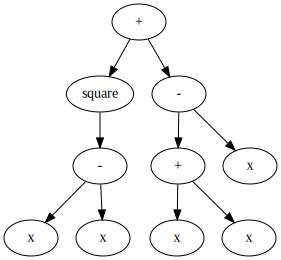

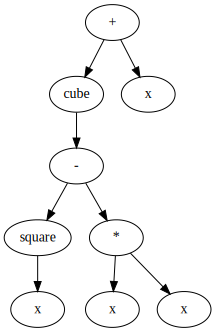

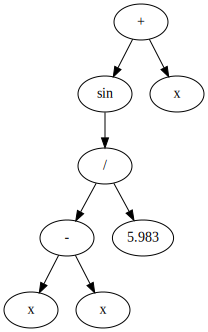

In [3]:
with open("Outputs/article_tests_new/PSO/trees/tree-4000-10-0", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
display(tree.visualize_tree())

with open("Outputs/article_tests_new/PSO/trees/tree-4000-10-1", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
display(tree.visualize_tree())

with open("Outputs/article_tests_new/PSO/trees/tree-4000-10-2", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
display(tree.visualize_tree())

In [24]:
from random import seed

In [29]:
X = X1
y = y1

np.random.seed(42)
seed(42)

# print(f"-=-=-=-=-=-=-=-= Training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-=-")
SR = SymbolicRegression(generations, 3, max_population_size=population,
                        max_island_count=int(population/10), random_const_range=const_range,
                        operators=operators_op, functions=functions_op, optimization_kind=optimization_kind,
                        custom_functions_dict=custom_functions_dict)
SR.fit(np.c_[X], y, feature_names=["x"])    

start_time = time()
output_AEG = SR.predict()
end_time = time()
data = SR.evaluate_tree(output_AEG.sexp)

print(f"-=-=-=-=-=-=-= Done training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-")

# Writing the data =================================

# In case the output is a constant function
if data.shape[0] == 1:
    data = np.array([data[0] for i in range(0, 1000)])

data = pd.DataFrame(np.c_[X, data], columns=["x", "y"])
data.to_csv(dir_path + f"/data/data-{population}.csv", sep=",", index=False)

# graph = output_AEG.sexp.visualize_tree()
# graph.render(dir_path + f"/trees/tree-{population}", format="svg")

with open(dir_path + f"/trees/tree-{population}-{generations}-{0}", "wb") as file:
    pickle.dump(output_AEG.sexp, file)

with open(dir_path + "/results.csv", "a") as file:
    file.write(f"{SR.fitness_score(output_AEG)},{population},{generations},{end_time - start_time},{0}\n")

iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests_new/LS =-=-=-=-=-=-=-


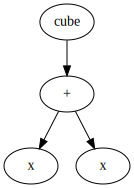

In [30]:
with open("Outputs/article_tests_new/LS/trees/tree-40-10-0", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
tree.visualize_tree()

# ======================

In [1]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt

In [2]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp": lambda a: np.exp(a), "tanh": lambda a: np.tanh(a)}
weights_op = {"exp": 4, "tanh": 4}

# F1

In [3]:
def f1(x):
    return 1.57 + 24.38*x

X = np.linspace(-1, 1, 1000)
y = f1(X)

In [4]:
# optimization_kind = "LS"
func = f1
x_range = [-1,1]
n_points = 1000
population = 40
generations = 10
const_range = (0,15)
dir_path = "Outputs/new_test/"
n_runs = 3
max_expression_size = 5

# Notes

# Training the model ===============================
for i in range(n_runs):
    print(f"-=-=-=-=-=-=-=-= Training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-=-")
    SR = SymbolicRegression(generations, max_expression_size, max_population_size=population,
                            max_island_count=int(population/10), random_const_range=const_range,
                            operators=operators_op, functions=functions_op, weights=weights_op)
    SR.fit(np.c_[X], y, feature_names=["x"])

    start_time = time()
    output_AEG = SR.predict()
    end_time = time()
    data = SR.evaluate_tree(output_AEG.sexp)

    print(f"-=-=-=-=-=-=-= Done training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-")

    # Writing the data =================================

    # In case the output is a constant function
    # if data.shape[0] == 1:
    #     data = np.array([data[0] for i in range(0, 1000)])

    # data = pd.DataFrame(np.c_[X, data], columns=["x", "y"])
    # data.to_csv(dir_path + f"/data/data-{population}.csv", sep=",", index=False)

    # graph = output_AEG.sexp.visualize_tree()
    # graph.render(dir_path + f"/trees/tree-{population}", format="svg")

    with open(dir_path + f"/trees/tree-{population}-{generations}-{i}", "wb") as file:
        pickle.dump(output_AEG.sexp, file)

    with open(dir_path + "/results.csv", "a") as file:
        file.write(f"{SR.fitness_score(output_AEG)},{population},{generations},{end_time - start_time},{i}\n")

In [19]:
X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size=max_expression_size, normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op)

-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - new_test/ =-=-=-=-=-=-=-


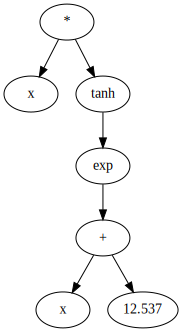

In [21]:
with open("Outputs/new_test/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)

    # smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    # display(smp_expr)
tree.visualize_tree()

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

SR.fit(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]).reshape(-1), feature_names=["x"])

In [29]:
x = smp.symbols("x")

x*tanh(278451.729453361*exp(x))

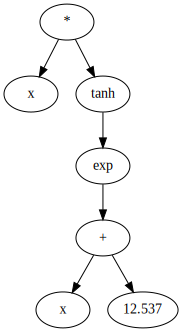

6.4249022944758185e-34

48.76*(0.5*x + 0.5)*tanh(459089.289212993*exp(0.5*x)) - 22.81

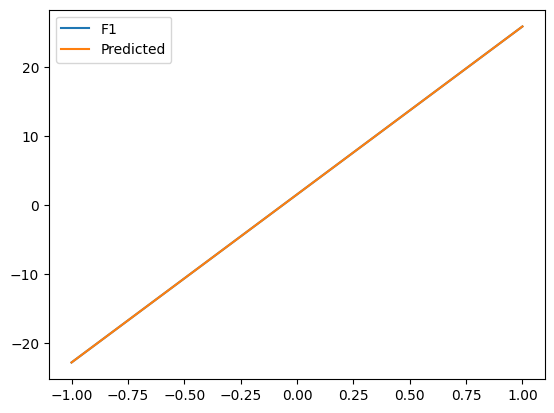

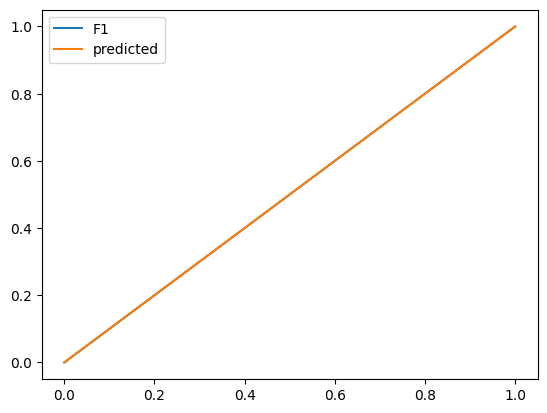

In [38]:
with open("Outputs/new_test/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
    
display(tree.visualize_tree())
display(SR.fitness_score(tree))

# ======================
smp_func, _ = tree.toFunc(SR._operators, SR._functions, SR.custom_functions_dict)


smp_expr = smp_expr.subs(x, (x - X.min())/(X.max() - X.min()))
# smp_expr = smp_expr.subs(x, (X1.max() - X1.min())*x + X1.min() )
smp_expr = (y.max() - y.min())*smp_expr + y.min()
# smp_expr = (y1_max - y1_min)*smp_expr + y1_min
# smp_expr = (smp_expr - y1.min())/(y1.max() - y1.min())
display(smp_expr)

smp_func = smp.lambdify(x, smp_expr)

Xr = np.linspace(-1, 1, 1000)
yr = smp_func(X)

plt.plot(Xr, yr, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()
plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="F1")
plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="predicted")
plt.legend()


# Plot Test

In [5]:
scaler = MinMaxScaler()

In [6]:
def f1(v):
    return 1.57 + 24.3*v

X = np.linspace(-1, 1, 1000)
y = f1(X)

X_scaled = scaler.fit_transform(np.c_[X])
y_scaled = scaler.fit_transform(np.c_[y]).reshape(-1)

In [7]:
np.mean((y_scaled - scaler.fit_transform(np.c_[y_pred]).reshape(-1))**2)

NameError: name 'y_pred' is not defined

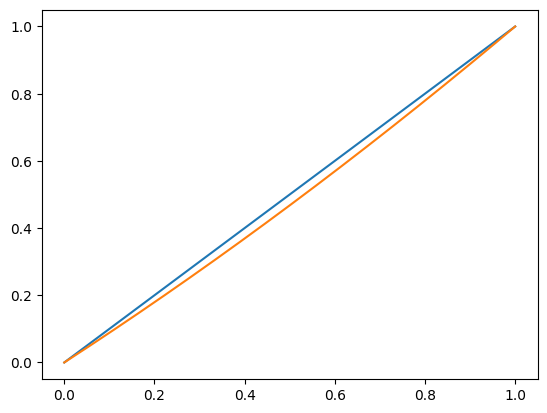

In [9]:
def r_func(x):
    return (x+7.722)**2

X_test = np.linspace(0, 1, 1000)
y_pred = r_func(X)

plt.plot(X_scaled, y_scaled)
plt.plot(X_test, scaler.fit_transform(np.c_[y_pred]))

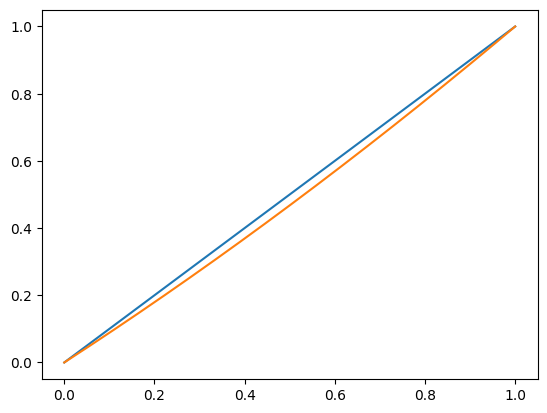

In [10]:
y_max = y_pred.max()
y_min = y_pred.min()
x_min = 0
x_max = 1

def nr_func(x):
    return ((x+7.722)**2 - y_min)/(y_max - y_min)
    # return (x+7.722)**2 * (y_max - y_min) + y_min

X_test = np.linspace(0, 1, 1000)
y_npred = nr_func(X)

plt.plot(X_scaled, y_scaled)
plt.plot(X_test, y_npred)

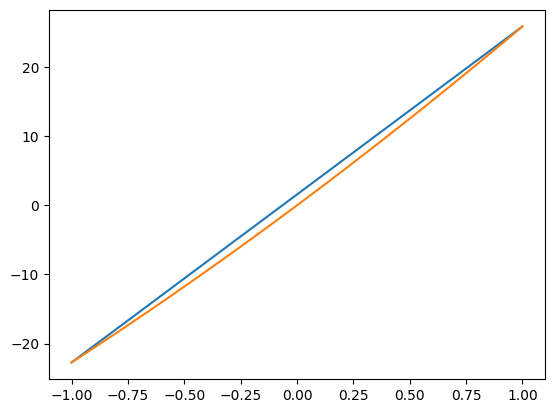

In [25]:
X_test = np.linspace(-1, 1, 1000)

# scaler.fit(np.c_[y])

def ur_func(x):
    return (((x+7.722)**2 - y_min)/(y_max - y_min))*(y.max()-y.min()) + y.min()

plt.plot(X, y)
plt.plot(X_test, ur_func(X_test))

# Fitness Evaluation 

In [5]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "cube": lambda a: a**3}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"],
                         "sin": ["np.sin(", ")"], "cos": ["np.cos(", ")"]}

In [6]:
def f1(v):
    return 1.57 + 24.3*v

X1 = np.linspace(-1, 1, 1000)
y1 = f1(X1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
SR = SymbolicRegression(10, functions=functions_op, operators=operators_op, custom_functions_dict=custom_functions_dict)

SR.fit(scaler.fit_transform(np.c_[X1]), scaler.fit_transform(np.c_[y1]).reshape(-1), feature_names=["x"])

(x + 7.722)**2

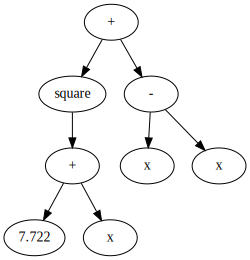

In [9]:
with open("Outputs/article_tests/LS/trees/tree-4000-10-1", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
tree.visualize_tree()

In [10]:
func, _ = tree.toFunc(SR._operators, SR._functions, SR.custom_functions_dict)
np.mean((y1 - func(X1))**2)

3436.060189291355

In [11]:
dii = {"x": [1, 2, 3], "g": [9.8, 9.8, 9.8]}
a = np.array(list(dii.values()))

In [12]:
def tfunc(x, g):
    return x+g

tfunc(*a)

array([10.8, 11.8, 12.8])

In [13]:
SR._features.values()

dict_values([array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.0730

In [14]:
SR.fit(np.c_[X1], y1, feature_names=["x"])
SR.fitness_score(tree)

3436.060189291355

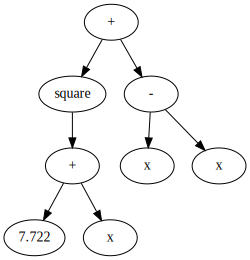

In [15]:
made_tree = ExpressionTree()
p_root = made_tree.add_root("+")
p_r = made_tree.add_right(p_root, "-")
made_tree.add_left(p_r, "x")
made_tree.add_right(p_r, "x")
p_l = made_tree.add_left(p_root, "square")
p = made_tree.add_left(p_l, "+")
made_tree.add_left(p, 7.722)
made_tree.add_right(p, "x")

made_tree.visualize_tree()

In [16]:
SR.fit(scaler.fit_transform(np.c_[X1]), scaler.fit_transform(np.c_[y1]).reshape(-1), feature_names=["x"])
SR.fitness_score(made_tree)

4533.717021998206

In [17]:
SR.evaluate_tree(made_tree)

array([59.629284  , 59.64474446, 59.66020693, 59.6756714 , 59.69113787,
       59.70660635, 59.72207683, 59.73754931, 59.7530238 , 59.7685003 ,
       59.78397879, 59.7994593 , 59.8149418 , 59.83042631, 59.84591283,
       59.86140134, 59.87689186, 59.89238439, 59.90787892, 59.92337545,
       59.93887399, 59.95437453, 59.96987708, 59.98538163, 60.00088818,
       60.01639674, 60.0319073 , 60.04741987, 60.06293444, 60.07845101,
       60.09396959, 60.10949017, 60.12501275, 60.14053734, 60.15606394,
       60.17159253, 60.18712314, 60.20265574, 60.21819035, 60.23372697,
       60.24926558, 60.2648062 , 60.28034883, 60.29589346, 60.31144009,
       60.32698873, 60.34253937, 60.35809202, 60.37364667, 60.38920332,
       60.40476198, 60.42032264, 60.43588531, 60.45144998, 60.46701665,
       60.48258533, 60.49815601, 60.5137287 , 60.52930339, 60.54488008,
       60.56045878, 60.57603948, 60.59162219, 60.6072069 , 60.62279361,
       60.63838233, 60.65397305, 60.66956578, 60.68516051, 60.70

In [18]:
SR.fit(np.c_[X1], y1, feature_names=["x"])
SR.fitness_score(made_tree)

3436.060189291355

In [19]:
string = made_tree.toString(SR._operators, SR._functions, SR.custom_functions_dict)
string

'(((7.722+x))**2+(x-x))'

In [20]:
SR._feature_names

['x']

In [21]:
def create_function_from_string(func_str):
    global_vars = {}
    exec(func_str, global_vars)
    func_name = func_str.strip().split('\n')[0].split()[1].split('(')[0]
    return global_vars[func_name]


In [22]:
di = {}
exec(f"""def f(x):
    return {string}""", di)
di["f"](X)

array([45.185284  , 45.21220292, 45.23912986, 45.26606482, 45.29300779,
       45.31995877, 45.34691778, 45.3738848 , 45.40085983, 45.42784288,
       45.45483395, 45.48183303, 45.50884013, 45.53585525, 45.56287838,
       45.58990953, 45.61694869, 45.64399587, 45.67105106, 45.69811428,
       45.7251855 , 45.75226475, 45.77935201, 45.80644728, 45.83355057,
       45.86066188, 45.8877812 , 45.91490854, 45.9420439 , 45.96918727,
       45.99633866, 46.02349806, 46.05066548, 46.07784092, 46.10502437,
       46.13221584, 46.15941532, 46.18662282, 46.21383834, 46.24106187,
       46.26829342, 46.29553298, 46.32278056, 46.35003616, 46.37729977,
       46.4045714 , 46.43185104, 46.4591387 , 46.48643438, 46.51373807,
       46.54104978, 46.5683695 , 46.59569724, 46.623033  , 46.65037677,
       46.67772856, 46.70508836, 46.73245618, 46.75983202, 46.78721587,
       46.81460774, 46.84200762, 46.86941552, 46.89683144, 46.92425537,
       46.95168732, 46.97912728, 47.00657527, 47.03403126, 47.06

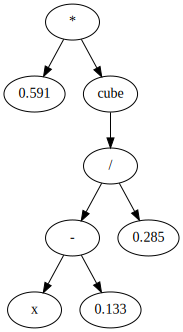

In [36]:
tree = SR.generate_expr(4)
tree.visualize_tree()

In [37]:
tree.toString(SR._operators, SR._functions, SR.custom_functions_dict)

'(0.591*(np.divide((x-0.133),0.285))**3)'

In [38]:
to_func = SR.toFunc(tree)
to_func(2.1)

194.29694881482564

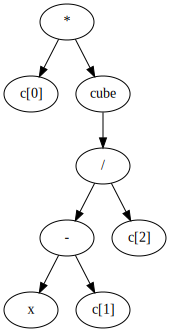

In [39]:
AEG = SR._convert_to_AEG(tree)
AEG.aexp.visualize_tree()

In [40]:
len(AEG.c.vector)

3

In [41]:
string = AEG.aexp.toString(SR._operators, SR._functions, SR.custom_functions_dict)
print(string)
string = string.replace("[", "").replace("]", "")
print(string)

(c[0]*(np.divide((x-c[1]),c[2]))**3)
(c0*(np.divide((x-c1),c2))**3)


In [42]:
print(string.find("/"))
splitted = string.split("/")
print(splitted)
print(splitted[0].rfind("("))

-1
['(c0*(np.divide((x-c1),c2))**3)']
15


In [43]:
[f"c{i}" for i in range(len(AEG.c.vector))]

['c0', 'c1', 'c2']

In [45]:
lambda_string = "lambda x,y: x/y"
context = {"np": np, "__truediv__": np.divide}
custom_lambda = eval(lambda_string, context, context)

custom_lambda(2,0)

ZeroDivisionError: division by zero

In [49]:
func = SR.toFunc(AEG)
func(2, 1, 2.2, 0)

<string>:1: RuntimeWarning: divide by zero encountered in true_divide


-inf